# Mecânica de Locomoção 
# *Veículos Ferroviários*
---
*prof. André Luiz Cunha*

In [3]:
import matplotlib.pyplot as plt
import altair as alt
from pandas import DataFrame

## 1. Fundamentação Teórica

Como vimos, a fundamentação básica de Mecânica de Locomoção é derivada da 2ª Lei de Newton, e a equação fundamental é:

$$F_{R} = m \cdot a$$
Sendo: 
- $F_{R}$ a Força Resultante [N];
- $m$ a massa do veículo [kg];
- $a$ a aceleração [m/s²].

O objetivo do estudo do *desempenho de veículos ferroviários* é determinar a velocidade de equilíbrio, assim como a capacidade de carga a ser transportada, dimensionar o comprimento máximo da composição ferroviária e verificar a eficiência de frenagem da composição.

---
## 2. Força Tratora em Locomotivas Diesel-Elétricas

A força tratora em Locomotivas Diesel-Elétrica disponível para o deslocamento veicular é o mínimo entre a Força Motriz ($F_{t}$) e a Força Motriz Máxima ($F_{tmax}$).

$$F = min(F_{t}, F_{tmax})$$

### 2.1. Força Motriz

A equação para a força tratora em veículos ferroviários é em função da unidade da potência do motor, que pode ser em kW (quilo Watt), hp (horsepower) ou cv (cavalo-vapor).

$$F_{t} = \eta \cdot 3600 \cdot \frac{P [kW]}{V}$$

$$F_{t} = \eta \cdot 2685 \cdot \frac{P [hp]}{V}$$

$$F_{t} = \eta \cdot 2649 \cdot \frac{P [cv]}{V}$$

Em que:
- $F_{t}$ é a força tratora em [N];
- $P$ é a potência do motor na unidade indicada [W - Watt, hp - horsepower, cv - cavalo-vapor];
- $V$ é a velocidade do veículo em [km/h].


Para locomotivas diesel-elétrica, um valor coerente para a constante $\eta$ é 0,81.

In [4]:
# Traction force funtion
def Ft(P, V, unit='kW', n=0.81):
    '''Ft in kN'''
    k = 3600
    if unit == 'hp':
        k = 2685
    if unit == 'cv':
        k = 2649
    return (n * k * P)/ (V * 1000) #kN


In [3]:
Ft(3000, 50)

174.96

### 2.2. Tração por aderência
A tração por aderência determina qual a maior força motriz que pode ser utilizada para movimentar o veículo. A limitação pela aderência é mais notada nas velocidades mais baixas, quando o veículo está iniciando o movimento e exigindo mais força para sair da inércia.

Quando uma roda motriz é submetida a um torque $T$, a força de tração na roda deve ser menor ou igual ao atrito com o pavimento. Se a força motriz $F_{t}$ for maior que o atrito da roda com o trilho ($F_{a}$), a roda patina, pois não há atrito suficiente, e a locomotiva não sai do lugar. Se $F_{t} \lt F_{a}$, então a força de atrito é suficiente para impedir que a roda patine e então a locomotiva é capaz de se movimentar, sendo propelida pela força $F_{t}$.

Assim, a tração por aderência, ou força motriz máxima, ($F_{tmax}$) é função do peso aderente da locomotiva e do coeficiente de atrito:

$$F_{tmax} = f \cdot T_{d}$$
Em que:
- $F_{tmax}$ é a força motriz máxima em [N];
- $f$ é o coeficiente de aderência;
- $T_{d}$ é o peso aderente da locomotiva [N].


O coeficiente de aderência $f$ não é um valor constante, mas varia com as condições da superfície do trilho: seca, molhada, limpa, suja, e etc. A tabela a seguir apresenta os valores típicos de aderência - Fonte: (Hay, 1982).


| Estado do trilho | Aderência $f$ |
| :--------------- | :------------ |
| totalmente seco e limpo | 0,33 |
| lavado pela chuva | 0,33 |
| seco e limpo | 0,22 |
| seco | 0,20 |
| molhado pela chuva | 0,14 |
| úmido de orvalho | 0,13 |
| úmido e sujo | 0,11 |
| sujo com óleo | 0,10 |

In [5]:
# Maximum Traction force funtion
def Ftmax(Td, f=0.30):
    '''Td in kN'''
    return (Td * f) # kN

In [5]:
Ftmax(5000)

1500.0

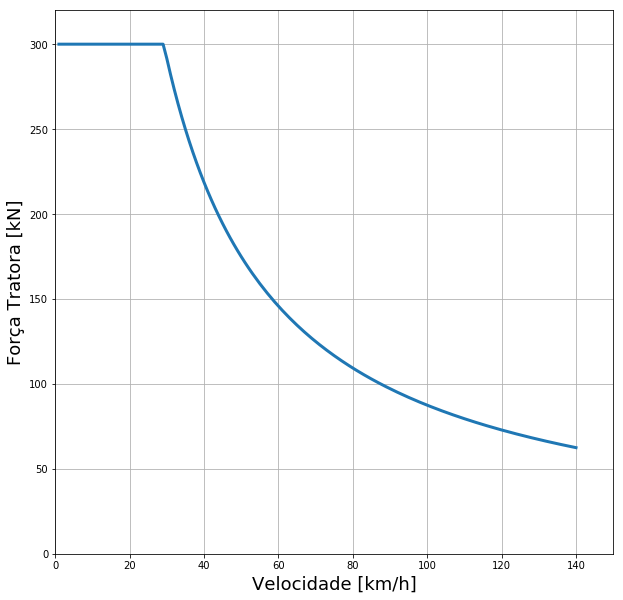

In [6]:
V = list(range(1,141))
P = 3000 #hp
Td = 1000 #kN = 100 toneladas
F = []

for v in V:
    F.append(min(Ft(P, v), Ftmax(Td)))
    
plt.figure(figsize=(10,10))
plt.plot(V, F, linewidth=3)

plt.xlabel('Velocidade [km/h]', size=18)
plt.ylabel('Força Tratora [kN]', size=18)
plt.grid(True)
plt.axis([0, 150, 0, 320])
plt.show()

In [15]:
data = {'velocidade':V, 'Forca':F}
source = DataFrame(data)

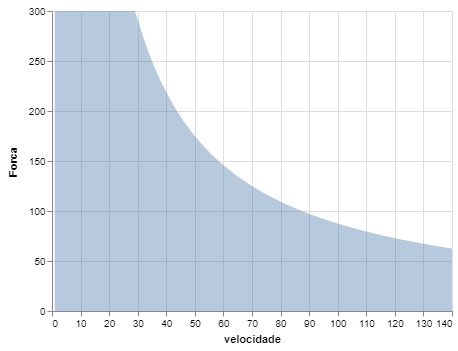

In [23]:
alt.Chart(source).mark_area(opacity=.4).encode(
    x='velocidade',
    y='Forca',
    tooltip=['velocidade','Forca']
    ).interactive()

---
## 3. Resistências ao Movimento

Quando uma composição ferroviária encontra-se em movimento, surgem diversas forças contrários ao deslocamento, denominadas de *resistência ao movimento*. As componentes dessa força são derivadas do contato da roda com o trilho, do deslocamento de ar provocado pelo veículo, e a própria ação da gravidade -- que pode dificultar ou facilitar o deslocamento do veículo.

A *Resistência Total ao Movimento* $R$ é dada por quatro componentes:

$$R = R_{r} + R_{a} + R_{g} + R_{c}$$

Sendo:
- $R$ : resistência total ao movimento em [N];
- $R_{r}$ : resistência ao rolamento em [N];
- $R_{a}$ : resistência aerodinâmica em [N];
- $R_{g}$ : resistência de rampa em [N};
- $R_{c}$ : resistência de curva em [N].

Dessas quatro componentes, a Resistência ao Rolamento ($R_{r}$) e a Aerodinâmica ($R_{a}$) **sempre** estão presentes -- essas duas componentes é denominada *Resistência Inerente* ao Movimento ($R_{I} = R_{r} + R_{a}$).

### 3.1. Resitência ao rolamento
Um abordagem empírica para estimar a resitência ao rolamento foi proposta por William S. Davis Jr., em 1926, e ficou conhecido como a *fórmula de Davis*. Os ensaios foram realizados nos EUA e o modelo pode ser aplicado em qualquer composição ferroviária ou metroviária para estimar a resitência ao rolamento a partir de parâmetros dos veículos, tais como peso, número de eixos e etc.

$$R_{r} = \bigg( c_{1} + \frac{c_{2} \cdot x}{G} + c_{3} \cdot V \bigg) \cdot G$$

Sendo:
- $R_{r}$ : resistência ao rolamento [N];
- $x$ : número de eixos da locomotiva ou vagão;
- $G$ : peso da locomotiva ou vagão [kN];
- $V$ : velocidade [km/h];
- $c_{1}$ : coeficiente de deformação da roda e do trilho;
- $c_{2}$ : coeficiente do atrito dos mancais;
- $c_{3}$ : coeficiente do atrito entre friso das rodas e o trilho.

| Coeficiente | Locomotiva e Vagão de Passageiro | Vagão de Carga |
| :---------- | :------------------------------- | :------------- |
| $c_{1}$ | 0,65 | 0,65 |
| $c_{2}$ | 125 | 125 |
| $c_{3}$ | 0,009 | 0,013 |


### 3.2. Resistência aerodinâmica

$$R_{a} = c_{a} \cdot A \cdot V^{2}$$

Em que:
- $R_{a}$ : resistência aerodinâmica [N];
- $c_{a}$ : coeficiente aerodinâmico;
- $A$ : áerea frontal [m²];
- $V$ : velocidade [km/h].

|Tipo de veículo | Área [m²] | $c_{a}$ |
| :------------- | :-------- | :------ |
| Locomotiva de carga | 9,0 - 14,5 | 0,046 |
| Locomotiva de passageiros | 9,0 - 11,0 | 0,031 |
| Vagão de carga | 7,5 - 8,5 | 0,009 |
| Vagão de passageiros | 10,0 - 11,0 | 0,006 |


### 3.3. Resistência de rampa
$$R_{g} = 10 \cdot G \cdot i$$
Sendo:
- $R_{g}$ : resistência de rampa [N];
- $G$ : peso da locomotiva ou vagão [kN];
- $i$ : declividade [%].


### 3.4. Resistência de curva

$$R_{c} = 698 \cdot \frac{G}{r}$$
Em que:
- $R_{c}$ : resistência de curva [N];
- $G$ : peso da locomotiva ou vagão [kN];
- $r$ : raio de curva [m].

In [7]:
'''Funções de Resistencia ao movimento'''
# Rolamento
def Rr(x, G, V, tipo='locomotiva'):
    c1 = 0.65
    c2 = 125
    if tipo=='carga':
        c3 = 0.013
    else:
        c3 = 0.009
        
    return (c1 + (c2 * x)/G + c3 * V) * G / 1000 # [kN]

def Ra(A, V, tipo='locomotiva'):
    if tipo=='locomotiva passageiro':
        ca = 0.031
    elif tipo == 'carga':
        ca = 0.009
    elif tipo == 'passageiro':
        ca = 0.006
    else:
        ca = 0.046
    return ca * A * V * V / 1000 # [kN]

def Rg(G, i):
    if i:
        return 10 * G * i / 1000 # [kN]
    return 0

def Rc(G, r):
    if r:
        return ((698 * G)/r)/1000 # [kN] 
    return 0

---
## 4. Exercício

Um trem de carga é composto por __**2 locomotivas diesel-elétrica e 40 vagões graneleiros**__.

|Locomotiva Diesel-elétrica | Vagão Hopper fechado |
| :---: | :----: |
| <img src="http://www.oocities.org/estrada_de_ferro/f-u26c-406.jpg" alt="Locomotiva Diesel-elétrica" width="400"> | <img src="http://www.boqnews.com/wp-content/uploads/2017/06/rumo-logistica.jpg" alt="Vagão Hopper fechado" width="400"> |

### Locomotiva
A locomotiva tem 6 eixos, todos motrizes; seção transversal de 11,5 m²; velocidade mínima de operação contínua (VMOC) de 18 km/h; velocidade máxima de 110 km/h; e eficiência de transmissão $\eta$ = 0,82. Adote o fator de aderência $f$ = 0,30.

Sabendo que $XYZ$ são os três últimos dígitos do número USP, o peso da locomotiva (em kN) é dado por: 
$$G_{loco} = 1300 - 300 \cdot e^{-0,0015 \cdot XYZ}$$

E a potência nominal (em hp) da locomotiva é: 
$$P = 3800 - 600 \cdot e^{-0,XYZ}$$

### Vagões de carga
Os vagões para transporte de grãos têm 4 eixos, seção transversal de 8,5 m² e, quando carregados, o peso bruto total (em kN) pode ser estimado por:
$$G_{vagao} = 700 + 300 \cdot e^{-0,0XYZ}$$

### Perfil do Trecho

O perfil vertical do trecho percorrido pela composição é dado a seguir:

<img src=".\_imgs\lista1-trecho.png" alt="Forças Atuantes" width="800">


In [8]:
'''Dados locomotiva'''
nL = 2
xL = 6 #eixos
AL = 11.5 #m²
GL = 1300 #kN
P = 3800 #hp
efic = 0.82
Vmax = 110 #km/h
Vmoc = 18 #km/h
fad = 0.3

'''Dados vagões'''
nV = 40
xV = 4
AV = 8.5 #m²
GV = 1000 #kN

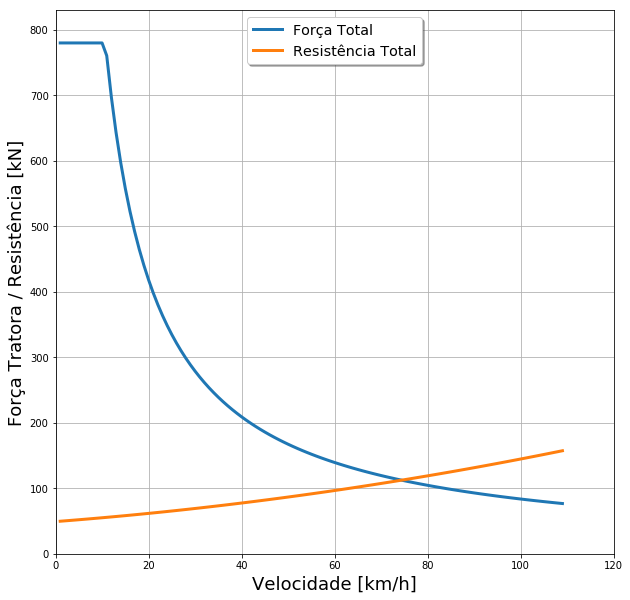

In [9]:
# parameters of profile
i = 0 #%
r = 0 #m

# list of speeds
V = list(range(1,Vmax))
F = []
R = []


for v in V:
    F.append( min(Ft(P,v,'hp',efic), Ftmax(GL*nL, fad)) )
    RL = Rr(xL, GL, v, 'locomotiva') + Ra(AL, v, 'locomotiva') + Rg(GL, i) + Rc(GL, r)
    RV = Rr(xV, GV, v, 'carga') + Ra(AV, v, 'carga') + Rg(GV, i) + Rc(GV, r)
    R.append(nL * RL + nV * RV)
    

# Draw graphic
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(V, F, label='Força Total', linewidth=3)
ax.plot(V, R, label='Resistência Total', linewidth=3)

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.xlabel('Velocidade [km/h]', size=18)
plt.ylabel('Força Tratora / Resistência [kN]', size=18)
plt.grid(True)
plt.axis([0, Vmax+10, 0, max(max(F),max(R))+50])
plt.show()
